In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.pyplot import figure
plt.style.use('ggplot')

In [2]:
# number of campaigns with certain keywords -- IGNORE
file = "/Users/divyag/desktop/campaign_bs4_data_final.csv"
df = pd.read_csv(file)
keywords = ['opiate', 'opioid', 'addiction', 'addict', 'heroin', 'drugs', 'overdose', 'dependency', 'demon', 'recovery', 'rehabilitation', 'rehab']
# num_keywords = [0]*len(keywords)

keywords_new = {}
for word in keywords:
    keywords_new[word] = 0
    

    
for string in df.All_Keywords:
    for word in keywords:
        if word in string:
            keywords_new[word]+=1

print(keywords_new)
y = []
for key in keywords_new:
    y.append(keywords_new[key])

{'opiate': 1000, 'opioid': 988, 'addiction': 998, 'addict': 1895, 'heroin': 960, 'drugs': 985, 'overdose': 900, 'dependency': 985, 'demon': 980, 'recovery': 834, 'rehabilitation': 638, 'rehab': 1449}


All_Keywords    ['addict', 'overdose', 'addiction', 'opiate', ...
Total_Raised                                               3017.0
Name: 33, dtype: object
1.63376815937283


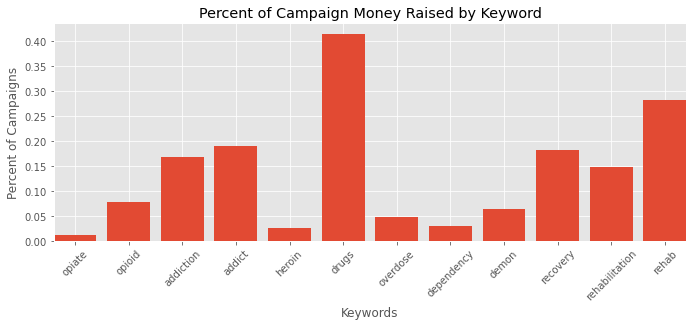

In [3]:
df = df.dropna()
df_test = df[['All_Keywords', 'Total_Raised']]
#print(df_test)
print((df_test.iloc[0]))

avgs = {}

sum_raised = 0.0
for word in keywords:
    avgs[word] = 0.0
    
for i in range(len(df_test)):
    row = df_test.iloc[i]
    
    
    
    
    for word in keywords:
        if word in row[0]:
            avgs[word]+=float(row[1])
    #print(row[1], type(row[1]))
    if '.' in row[1]:
        sum_raised+=float(row[1])
            
for key in avgs:
    avgs[key] = avgs[key]/(sum_raised)
            
y = []
avgsum = 0.0
for key in avgs:
    y.append(avgs[key])
    avgsum+=avgs[key]
    
print(avgsum)

fig = plt.bar(keywords, y)

plt.title("Percent of Campaign Money Raised by Keyword")
plt.xlabel("Keywords")
plt.xticks(rotation = 45)
plt.ylabel("Percent of Campaigns")

N = 12
plt.gca().margins(x=0)
plt.gcf().canvas.draw()
tl = plt.gca().get_xticklabels()
maxsize = max([t.get_window_extent().width for t in tl])
m = 0.2 # inch margin
s = maxsize/plt.gcf().dpi*N+2*m
margin = m/plt.gcf().get_size_inches()[0]

plt.gcf().subplots_adjust(left=margin, right=1.-margin)
plt.gcf().set_size_inches(s, plt.gcf().get_size_inches()[1])